In [2]:
#Predicting Insurance Premiums with Data-Driven Insights for SecureLife Insurance Co.
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Insurance Premium Prediction Dataset.csv")
df.head()

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0              NaN           13          320.0                   5   
1              NaN            3          694.0                   4   
2              2.0           16          652.0                   8   
3              1.0           11          330.0                   7   
4              NaN            9            NaN                   8   

   Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0           308.0           21:39.1              Poor            Yes   
1           517.0           21:39.1              Good            Yes   
2           849.0           21:39.1              Poor             No   
3           927.0           21:39.1              Poor             No   
4           303.0           21:39.1              Poor             No   

  Exercise_Frequency Property_Type  
0              Daily         Condo  
1            Monthly         House  
2            Monthly         House  
3             Rarely         Condo  
4             Rarely         Condo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual_Income         264905 non-null  float64
 3   Marital_Status        273841 non-null  object 
 4   Number_of_Dependents  250974 non-null  float64
 5   Education_Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health_Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy_Type           278860 non-null  object 
 10  Previous_Claims       197572 non-null  float64
 11  Vehicle_Age           278860 non-null  int64  
 12  Credit _Score         250974 non-null  float64
 13  Insurance_Duration    278860 non-null  int64  
 14  Premium_Amount        277019 non-null  float64
 15  

In [6]:
#The missisng values
missing_vals = ['n/a', ' ', '-', '?']

df = pd.read_csv('/content/Insurance Premium Prediction Dataset.csv', na_values=missing_vals)
df.head()

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0              NaN           13          320.0                   5   
1              NaN            3          694.0                   4   
2              2.0           16          652.0                   8   
3              1.0           11          330.0                   7   
4              NaN            9            NaN                   8   

   Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0           308.0           21:39.1              Poor            Yes   
1           517.0           21:39.1              Good            Yes   
2           849.0           21:39.1              Poor             No   
3           927.0           21:39.1              Poor             No   
4           303.0           21:39.1              Poor             No   

  Exercise_Frequency Property_Type  
0              Daily         Condo  
1            Monthly         House  
2            Monthly         House  
3             Rarely         Condo  
4             Rarely         Condo

In [7]:
#To identify the number of missing values
df.isnull().sum()

Age                      4685
Gender                      0
Annual_Income           13955
Marital_Status           5019
Number_of_Dependents    27886
Education_Level             0
Occupation              81288
Health_Score            10597
Location                    0
Policy_Type                 0
Previous_Claims         81288
Vehicle_Age                 0
Credit _Score           27886
Insurance_Duration          0
Premium_Amount           1841
Policy_Start_Date           0
Customer_Feedback       18349
Smoking_Status              0
Exercise_Frequency          0
Property_Type               0
dtype: int64

In [8]:
#Number of columns and row with all missing values
df.isnull().all(axis=0).sum()


np.int64(0)

In [9]:
df.isnull().all(axis=1).sum()

np.int64(0)

In [10]:
df_num = df.select_dtypes(include=['number'])
df_num.head()

Age  Annual_Income  Number_of_Dependents  Health_Score  Previous_Claims  \
0  56.0        99990.0                   1.0     31.074627              NaN   
1  46.0         2867.0                   1.0     50.271335              NaN   
2  32.0        30154.0                   3.0     14.714909              2.0   
3  60.0        48371.0                   0.0     25.346926              1.0   
4  25.0        54174.0                   0.0      6.659499              NaN   

   Vehicle_Age  Credit _Score  Insurance_Duration  Premium_Amount  
0           13          320.0                   5           308.0  
1            3          694.0                   4           517.0  
2           16          652.0                   8           849.0  
3           11          330.0                   7           927.0  
4            9            NaN                   8           303.0

In [11]:
#import Library
from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include='number').columns
mean_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = mean_imputer.fit_transform(df[numeric_cols])


#mean_imputer = SimpleImputer(strategy = 'mean')
#df[df_num] = mean_imputer.fit_transform(df[df_num])

df.head()

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0         0.998117         13.0     320.000000                 5.0   
1         0.998117          3.0     694.000000                 4.0   
2         2.000000         16.0     652.000000                 8.0   
3         1.000000         11.0     330.000000                 7.0   
4         0.998117          9.0     574.362049                 8.0   

   Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0           308.0           21:39.1              Poor            Yes   
1           517.0           21:39.1              Good            Yes   
2           849.0           21:39.1              Poor             No   
3           927.0           21:39.1              Poor             No   
4           303.0           21:39.1              Poor             No   

  Exercise_Frequency Property_Type  
0              Daily         Condo  
1            Monthly         House  
2            Monthly         House  
3             Rarely         Condo  
4             Rarely         Condo

In [12]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   278860 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual_Income         278860 non-null  float64
 3   Marital_Status        273841 non-null  object 
 4   Number_of_Dependents  278860 non-null  float64
 5   Education_Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health_Score          278860 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy_Type           278860 non-null  object 
 10  Previous_Claims       278860 non-null  float64
 11  Vehicle_Age           278860 non-null  float64
 12  Credit _Score         278860 non-null  float64
 13  Insurance_Duration    278860 non-null  float64
 14  Premium_Amount        278860 non-null  float64
 15  

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0       56.0    Male   99990.000000        Married                   1.0   
1       46.0    Male    2867.000000         Single                   1.0   
2       32.0  Female   30154.000000       Divorced                   3.0   
3       60.0  Female   48371.000000       Divorced                   0.0   
4       25.0  Female   54174.000000       Divorced                   0.0   
...      ...     ...            ...            ...                   ...   
278855  53.0    Male   22594.000000       Divorced                   4.0   
278856  19.0  Female   42089.085329       Divorced                   4.0   
278857  45.0  Female     557.000000         Single                   1.0   
278858  60.0    Male    4064.000000         Single                   4.0   
278859  50.0  Female   66056.000000       Divorced                   1.0   

       Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0             Master's            NaN     31.074627     Urban  Comprehensive   
1           Bachelor's            NaN     50.271335     Urban  Comprehensive   
2           Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3                  PhD  Self-Employed     25.346926     Rural  Comprehensive   
4          High School  Self-Employed      6.659499     Urban  Comprehensive   
...                ...            ...           ...       ...            ...   
278855        Master's            NaN     24.455533  Suburban        Premium   
278856        Master's     Unemployed     25.239104  Suburban          Basic   
278857      Bachelor's  Self-Employed     62.112230     Rural        Premium   
278858        Master's       Employed      6.163919     Rural        Premium   
278859             PhD     Unemployed     25.962097     Rural        Premium   

        Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0              0.998117         13.0     320.000000                 5.0   
1              0.998117          3.0     694.000000                 4.0   
2              2.000000         16.0     652.000000                 8.0   
3              1.000000         11.0     330.000000                 7.0   
4              0.998117          9.0     574.362049                 8.0   
...                 ...          ...            ...                 ...   
278855         2.000000          2.0     500.000000                 8.0   
278856         0.998117         11.0     558.000000                 3.0   
278857         0.998117         19.0     751.000000                 7.0   
278858         0.998117         17.0     457.000000                 3.0   
278859         0.998117         13.0     797.000000                 9.0   

        Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0                308.0           21:39.1              Poor            Yes   
1                517.0           21:39.1              Good            Yes   
2                849.0           21:39.1              Poor             No   
3                927.0           21:39.1              Poor             No   
4                303.0           21:39.1              Poor             No   
...                ...               ...               ...            ...   
278855           367.0           21:39.3               NaN            Yes   
278856          3044.0           21:39.3               NaN            Yes   
278857          1334.0           21:39.3              Poor            Yes   
278858           662.0           21:39.3           Average            Yes   
278859          1240.0           21:39.3              Poor             No   

       Exercise_Frequency Property_Type  
0                   Daily         Condo  
1                 Monthly         House  
2                 Monthly         House  
3                  Rarely         Condo  
4                  Rarely         Condo  
...                   ...           ...  
278855         

In [13]:
#To identify the number of missing values
df.isnull().sum()

Age                         0
Gender                      0
Annual_Income               0
Marital_Status           5019
Number_of_Dependents        0
Education_Level             0
Occupation              81288
Health_Score                0
Location                    0
Policy_Type                 0
Previous_Claims             0
Vehicle_Age                 0
Credit _Score               0
Insurance_Duration          0
Premium_Amount              0
Policy_Start_Date           0
Customer_Feedback       18349
Smoking_Status              0
Exercise_Frequency          0
Property_Type               0
dtype: int64

In [14]:
#Categorical Missing value
categorical_cols = df.select_dtypes(include='object').columns

# apply most_frequent imputation for categoricals
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = most_frequent_imputer.fit_transform(df[categorical_cols])

df.head()

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0        Master's  Self-Employed     31.074627     Urban  Comprehensive   
1      Bachelor's  Self-Employed     50.271335     Urban  Comprehensive   
2      Bachelor's  Self-Employed     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0         0.998117         13.0     320.000000                 5.0   
1         0.998117          3.0     694.000000                 4.0   
2         2.000000         16.0     652.000000                 8.0   
3         1.000000         11.0     330.000000                 7.0   
4         0.998117          9.0     574.362049                 8.0   

   Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0           308.0           21:39.1              Poor            Yes   
1           517.0           21:39.1              Good            Yes   
2           849.0           21:39.1              Poor             No   
3           927.0           21:39.1              Poor             No   
4           303.0           21:39.1              Poor             No   

  Exercise_Frequency Property_Type  
0              Daily         Condo  
1            Monthly         House  
2            Monthly         House  
3             Rarely         Condo  
4             Rarely         Condo

In [15]:
df.isnull().sum()

Age                     0
Gender                  0
Annual_Income           0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Occupation              0
Health_Score            0
Location                0
Policy_Type             0
Previous_Claims         0
Vehicle_Age             0
Credit _Score           0
Insurance_Duration      0
Premium_Amount          0
Policy_Start_Date       0
Customer_Feedback       0
Smoking_Status          0
Exercise_Frequency      0
Property_Type           0
dtype: int64

In [16]:
df.shape

(278860, 20)

In [17]:
#check for duplicates
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


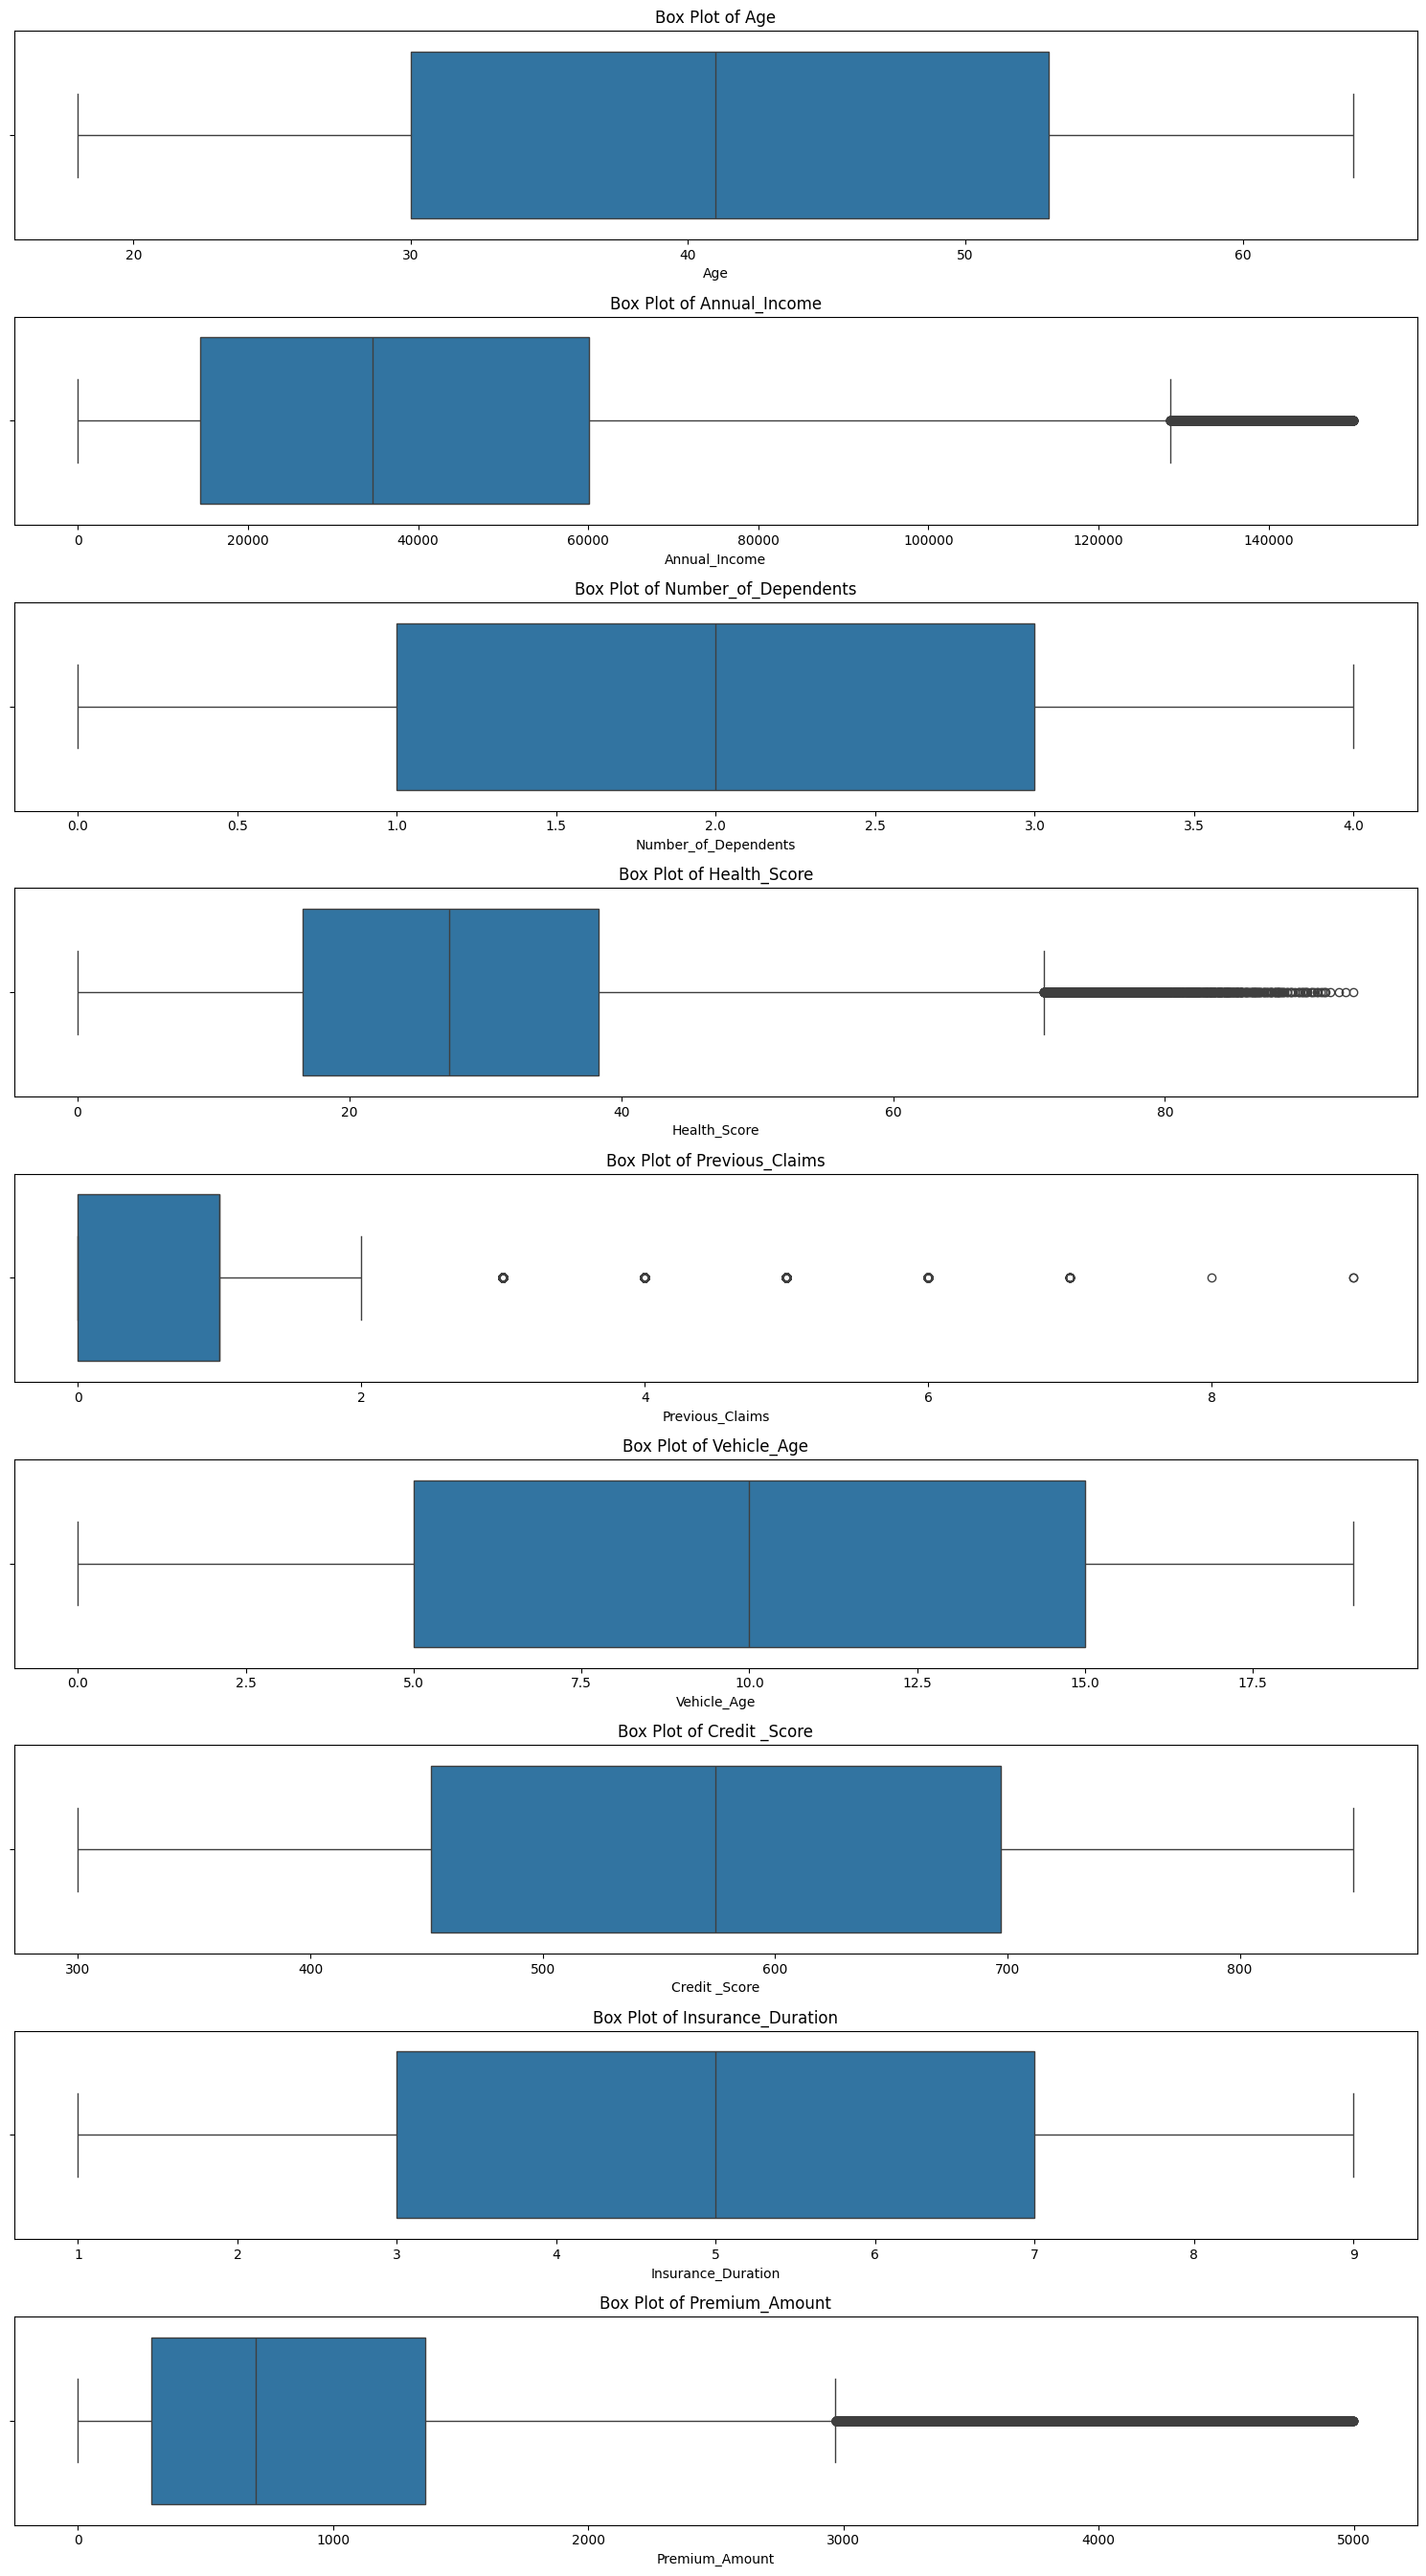

In [18]:
# filter numerical column for boxplot
num_feat = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(num_feat) * 3))  # Adjust size based on the number of features

for i, col in enumerate(num_feat, 1):
    plt.subplot(len(num_feat), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

In [19]:
#Annual Income
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit_1 = Q1 - 1.5*IQR
Upper_limit_1 = Q3 + 1.5*IQR
lower_limit_1, Upper_limit_1

df1 = df[(df.Annual_Income>lower_limit_1) & (df.Annual_Income<Upper_limit_1)]

In [20]:
#Health Score
Q1 = df['Health_Score'].quantile(0.25)
Q3 = df['Health_Score'].quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit_2 = Q1 - 1.5*IQR
Upper_limit_2 = Q3 + 1.5*IQR
lower_limit_2, Upper_limit_2

df2 = df1[(df1.Health_Score>lower_limit_2) & (df1.Health_Score<Upper_limit_2)]

In [21]:
#Previous Claims
Q1 = df['Previous_Claims'].quantile(0.25)
Q3 = df['Previous_Claims'].quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit_3 = Q1 - 1.5*IQR
Upper_limit_3 = Q3 + 1.5*IQR
lower_limit_3, Upper_limit_3

df3 = df2[(df2.Previous_Claims>lower_limit_3) & (df2.Previous_Claims<Upper_limit_3)]

In [22]:
#Premium Amount
Q1 = df['Premium_Amount'].quantile(0.25)
Q3 = df['Premium_Amount'].quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit_4 = Q1 - 1.5*IQR
Upper_limit_4 = Q3 + 1.5*IQR
lower_limit_4, Upper_limit_4

data = df3[(df3.Premium_Amount>lower_limit_4) & (df3.Premium_Amount<Upper_limit_4)]

data.head()

Age  Gender  Annual_Income Marital_Status  Number_of_Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education_Level     Occupation  Health_Score  Location    Policy_Type  \
0        Master's  Self-Employed     31.074627     Urban  Comprehensive   
1      Bachelor's  Self-Employed     50.271335     Urban  Comprehensive   
2      Bachelor's  Self-Employed     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
0         0.998117         13.0     320.000000                 5.0   
1         0.998117          3.0     694.000000                 4.0   
2         2.000000         16.0     652.000000                 8.0   
3         1.000000         11.0     330.000000                 7.0   
4         0.998117          9.0     574.362049                 8.0   

   Premium_Amount Policy_Start_Date Customer_Feedback Smoking_Status  \
0           308.0           21:39.1              Poor            Yes   
1           517.0           21:39.1              Good            Yes   
2           849.0           21:39.1              Poor             No   
3           927.0           21:39.1              Poor             No   
4           303.0           21:39.1              Poor             No   

  Exercise_Frequency Property_Type  
0              Daily         Condo  
1            Monthly         House  
2            Monthly         House  
3             Rarely         Condo  
4             Rarely         Condo

In [23]:
df.columns

Index(['Age', 'Gender', 'Annual_Income', 'Marital_Status',
       'Number_of_Dependents', 'Education_Level', 'Occupation', 'Health_Score',
       'Location', 'Policy_Type', 'Previous_Claims', 'Vehicle_Age',
       'Credit _Score', 'Insurance_Duration', 'Premium_Amount',
       'Policy_Start_Date', 'Customer_Feedback', 'Smoking_Status',
       'Exercise_Frequency', 'Property_Type'],
      dtype='object')

In [24]:
data.shape

(242492, 20)

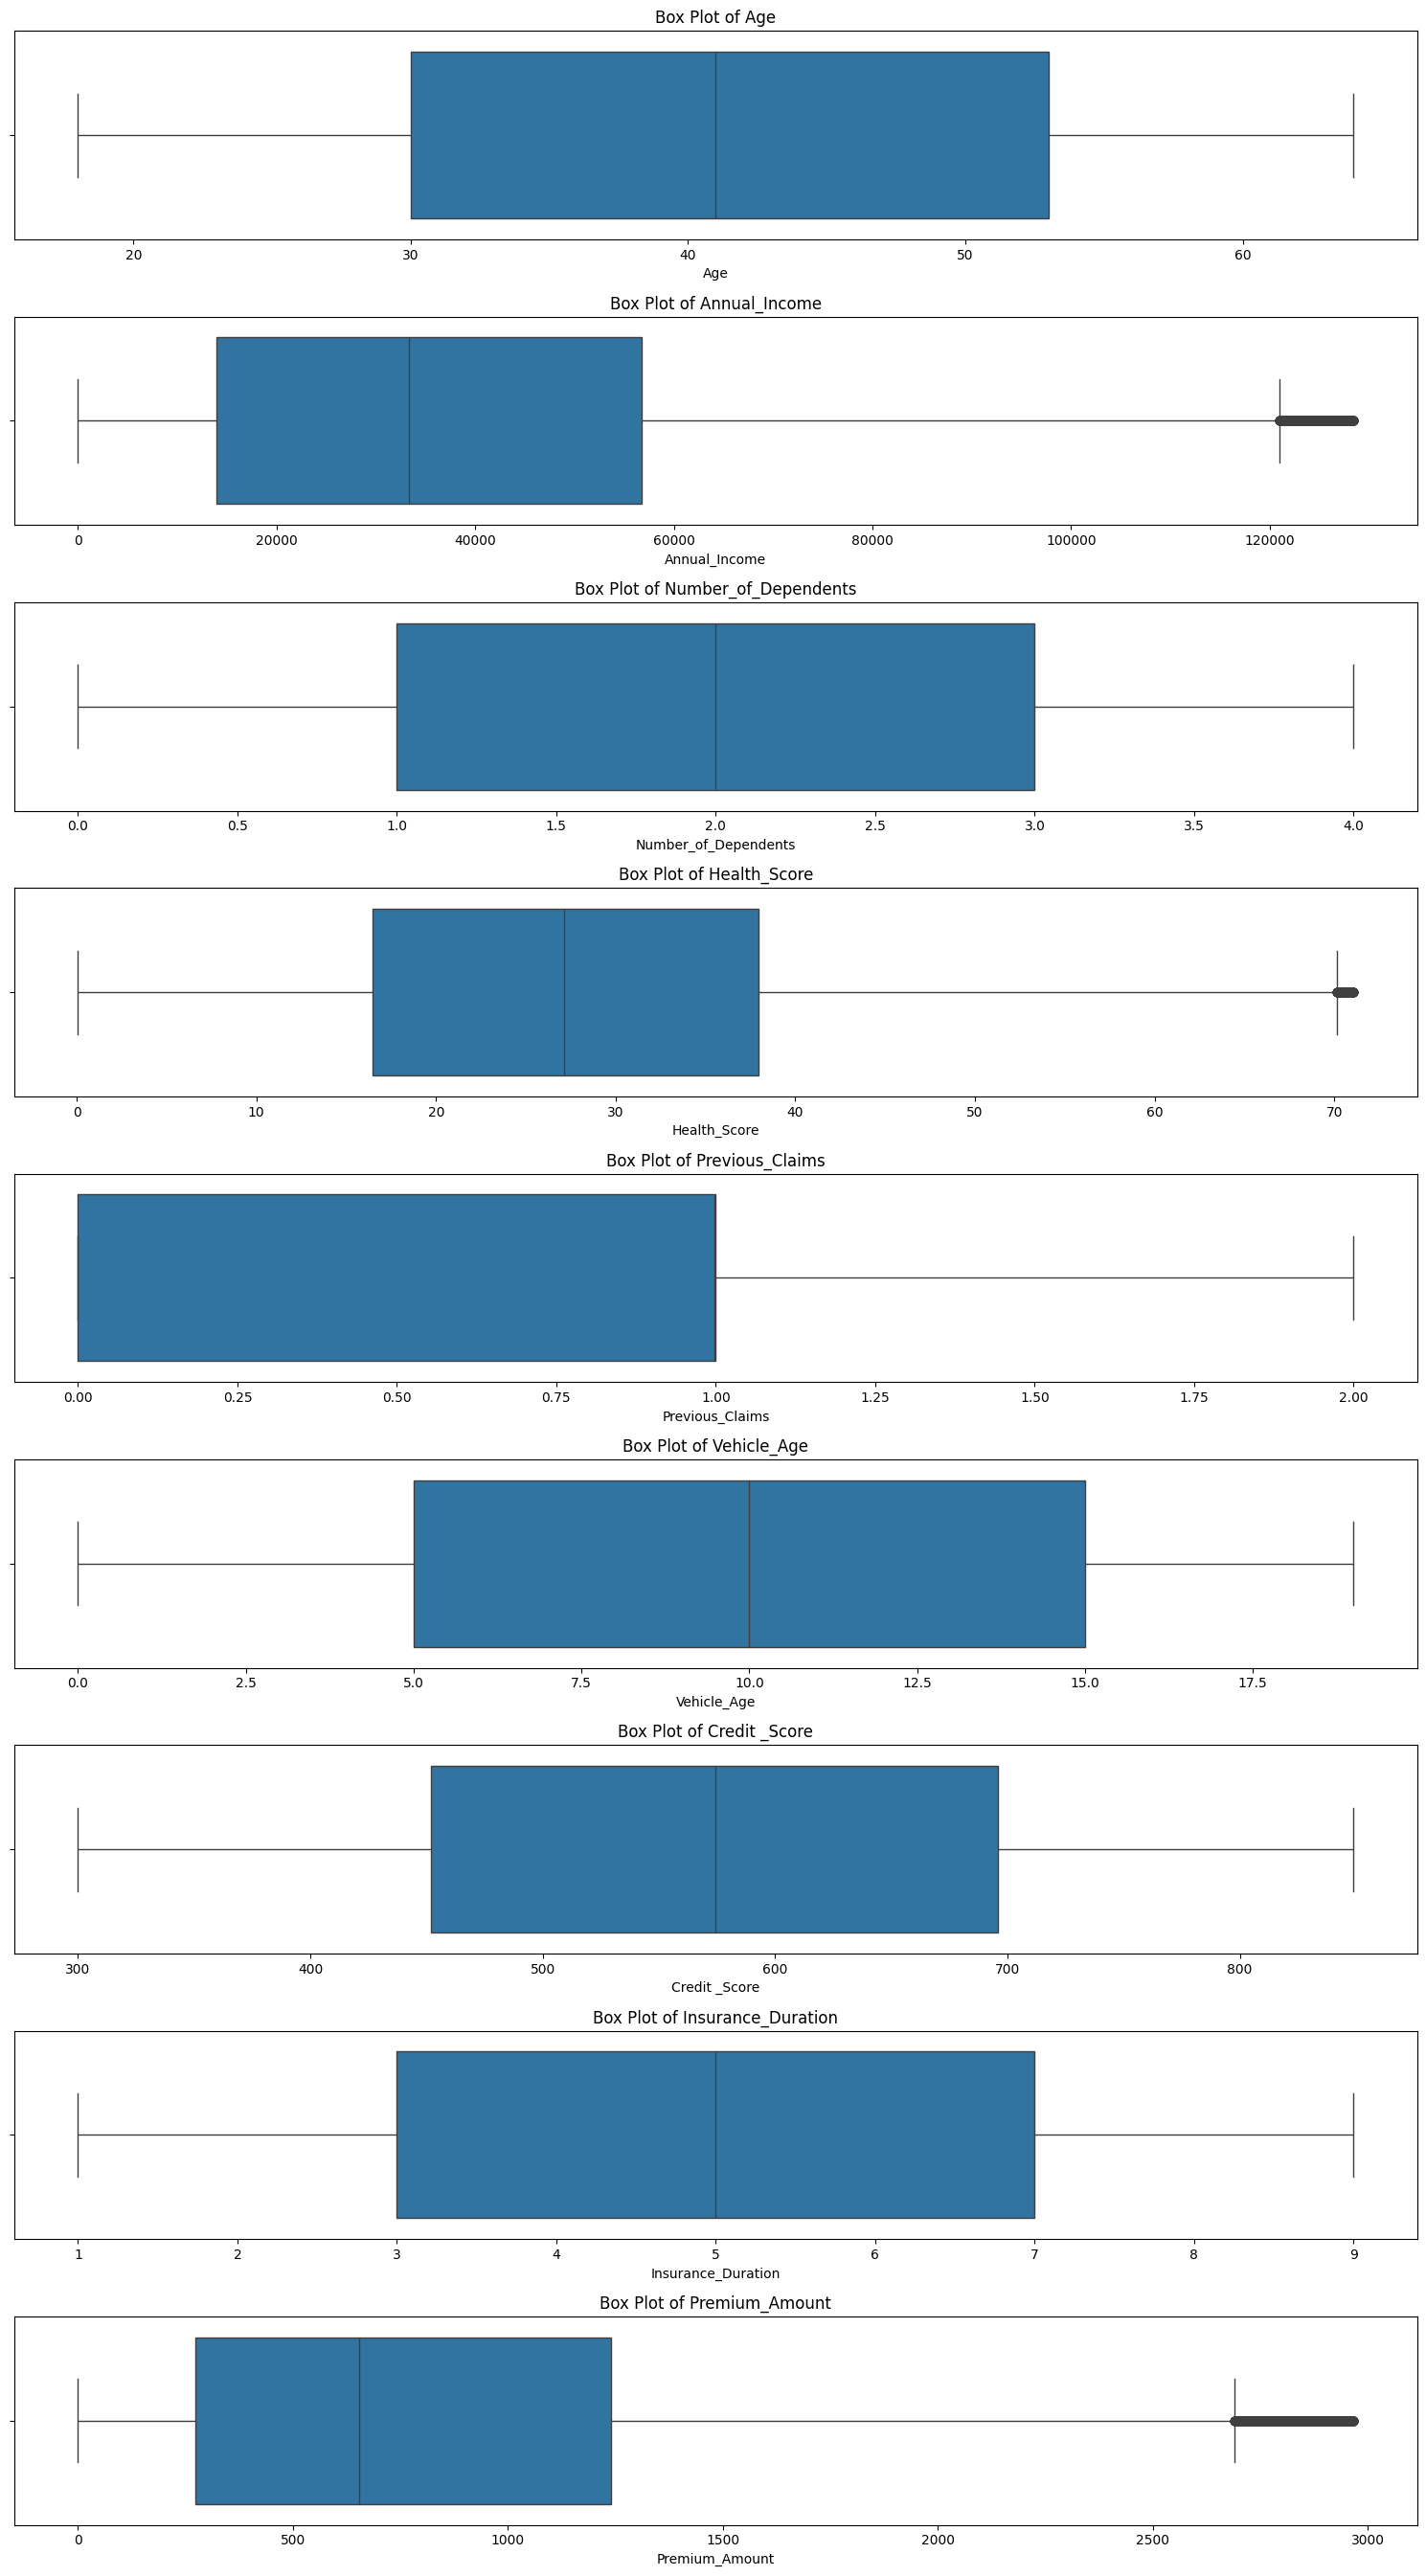

In [25]:
# Filter numerical columns for box plots
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(numerical_features) * 3))  # Adjust size based on the number of features
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

In [26]:
data.describe()

Age  Annual_Income  Number_of_Dependents   Health_Score  \
count  242492.000000  242492.000000         242492.000000  242492.000000   
mean       41.031077   39394.474204              1.999429      28.165111   
std        13.424648   30953.278384              1.339406      15.062921   
min        18.000000       0.000000              0.000000       0.073669   
25%        30.000000   13972.000000              1.000000      16.480103   
50%        41.000000   33313.000000              2.000000      27.108931   
75%        53.000000   56778.000000              3.000000      37.941270   
max        64.000000  128452.000000              4.000000      71.076047   

       Previous_Claims    Vehicle_Age  Credit _Score  Insurance_Duration  \
count    242492.000000  242492.000000  242492.000000       242492.000000   
mean          0.859920       9.520768     574.261052            5.005233   
std           0.627732       5.768312     150.668768            2.580719   
min           0.000000       0.000000     300.000000            1.000000   
25%           0.000000       5.000000     452.000000            3.000000   
50%           0.998117      10.000000     574.362049            5.000000   
75%           1.000000      15.000000     696.000000            7.000000   
max           2.000000      19.000000     849.000000            9.000000   

       Premium_Amount  
count   242492.000000  
mean       841.910910  
std        703.257702  
min          0.000000  
25%        274.000000  
50%        653.000000  
75%       1240.000000  
max       2967.000000

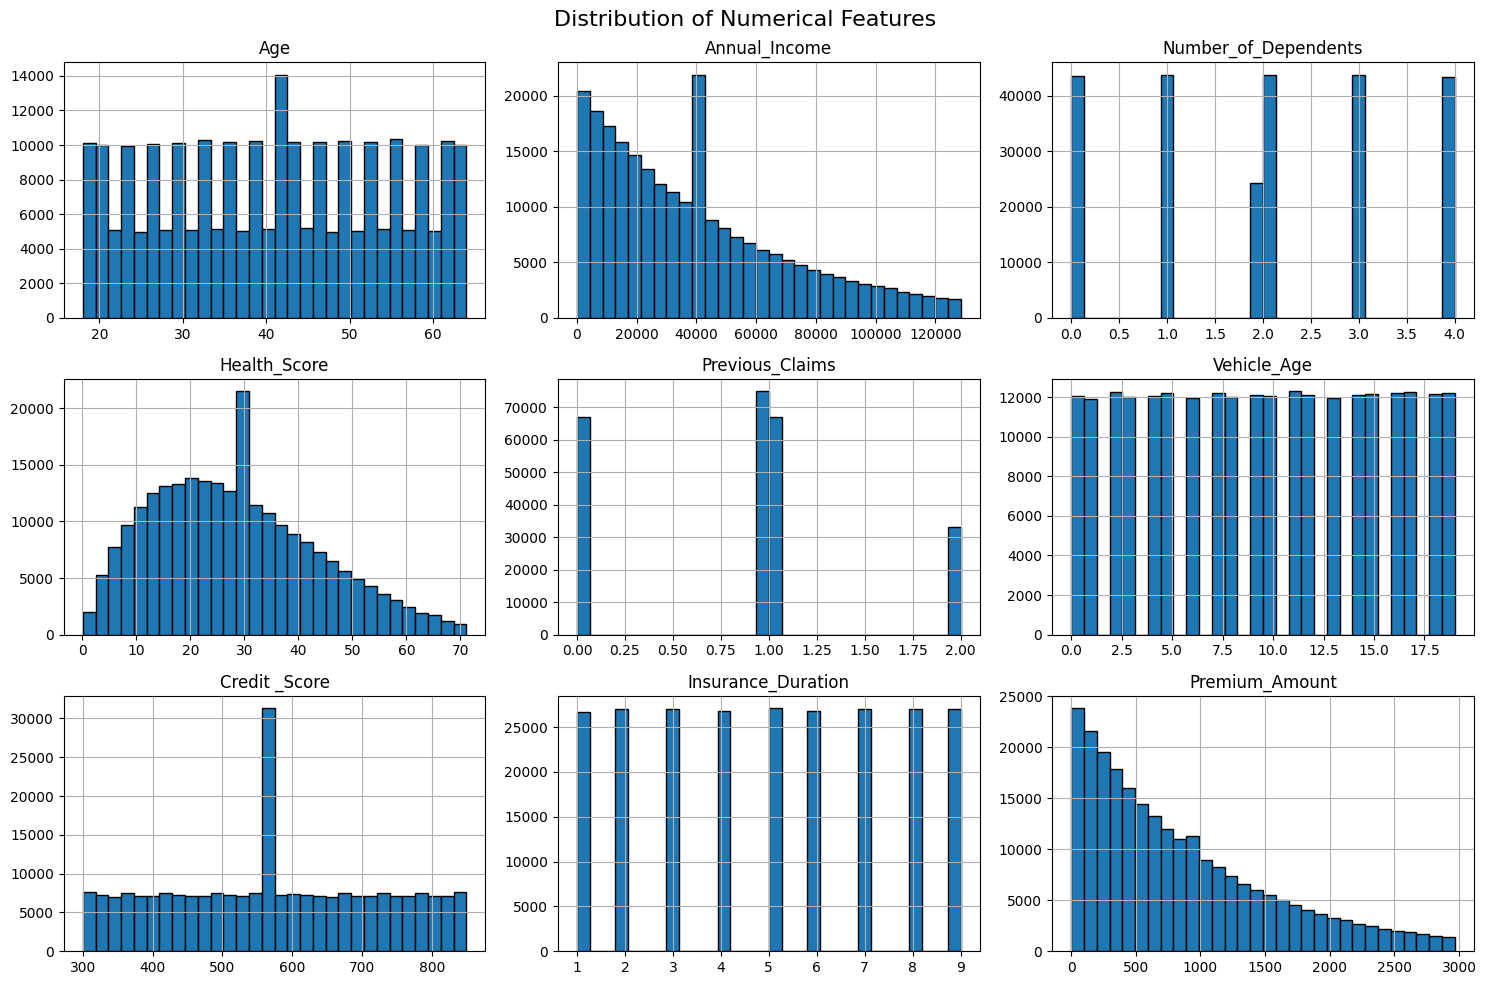

In [27]:
#Exploratory Data Analysis (EDA)
#Univariate Analysis
numerical_cols = ['Age', 'Annual_Income', 'Number_of_Dependents', 'Health_Score',
                  'Previous_Claims', 'Vehicle_Age', 'Credit _Score',
                  'Insurance_Duration', 'Premium_Amount']

data[numerical_cols].describe()

# Histograms
data[numerical_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

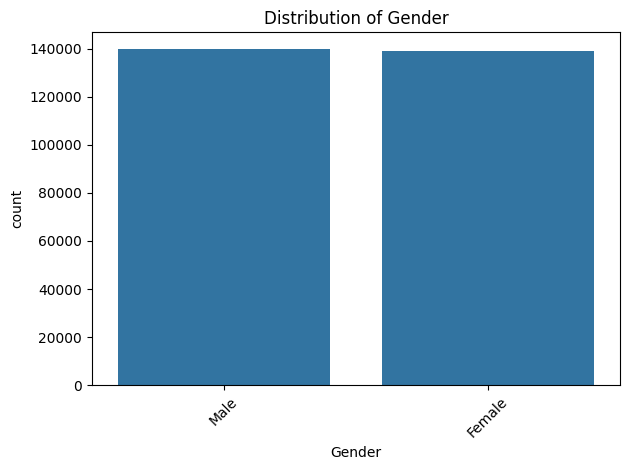

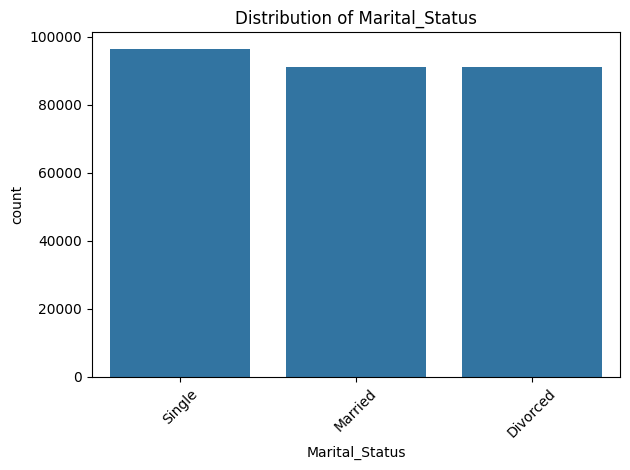

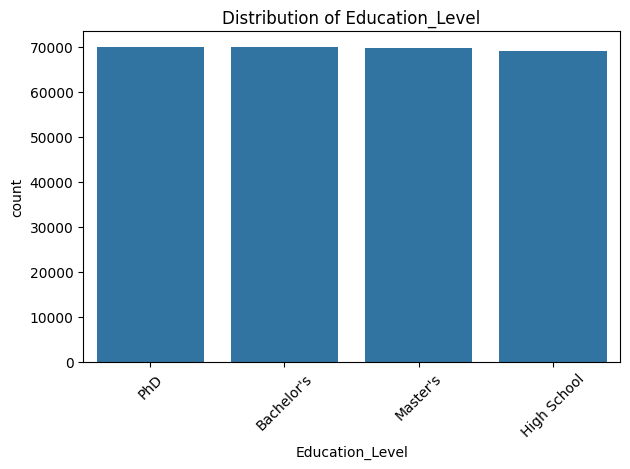

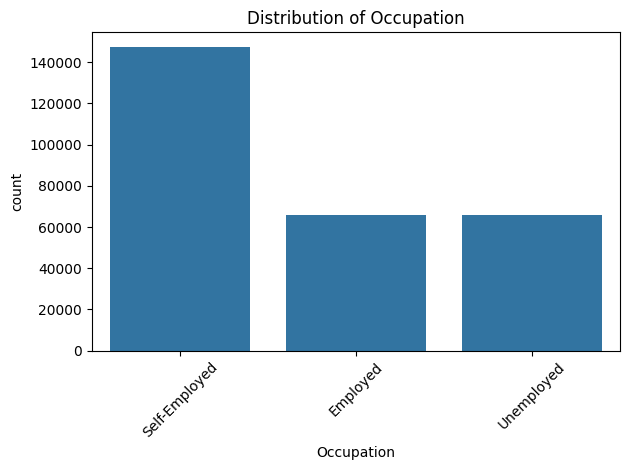

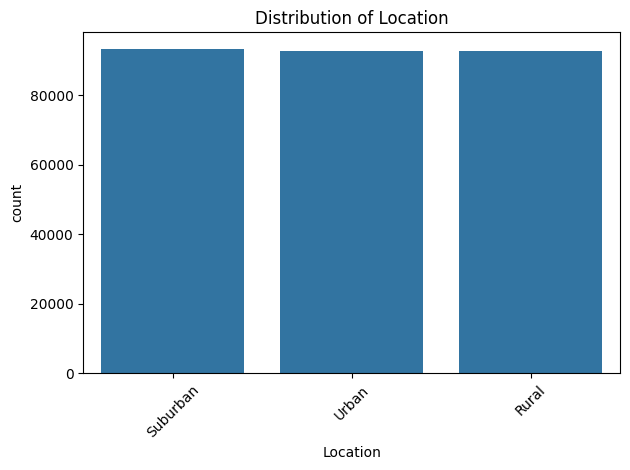

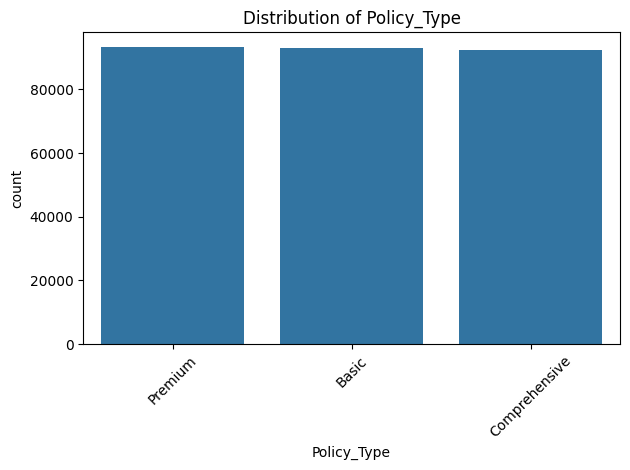

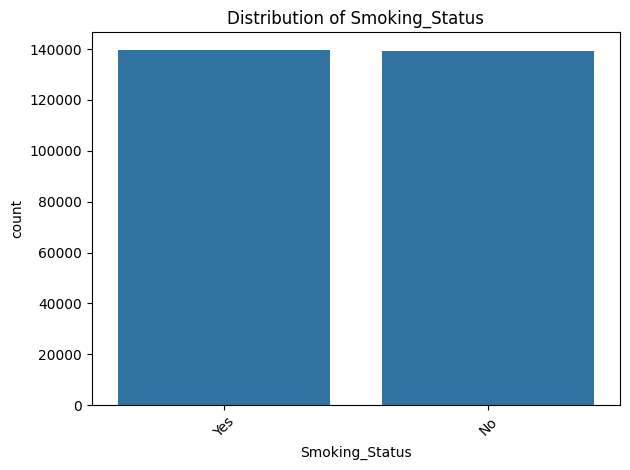

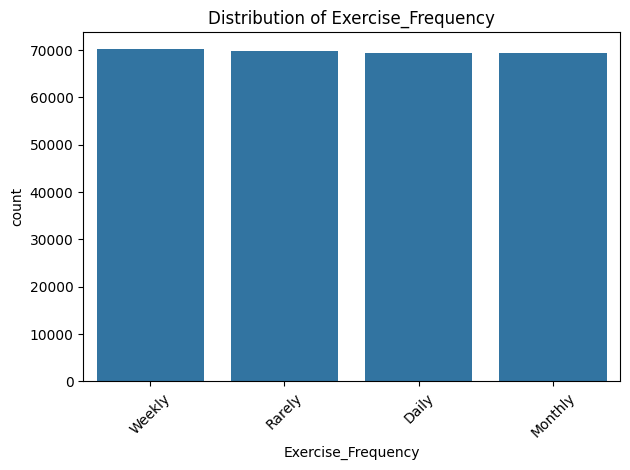

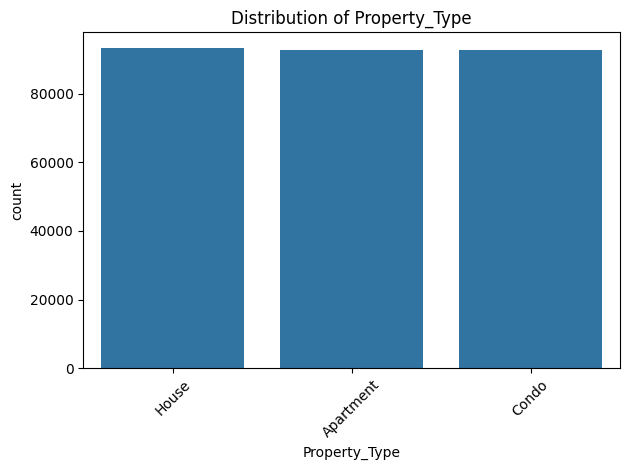

In [28]:
#Categorical Features
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level', 'Occupation',
                    'Location', 'Policy_Type', 'Smoking_Status',
                    'Exercise_Frequency', 'Property_Type']

for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

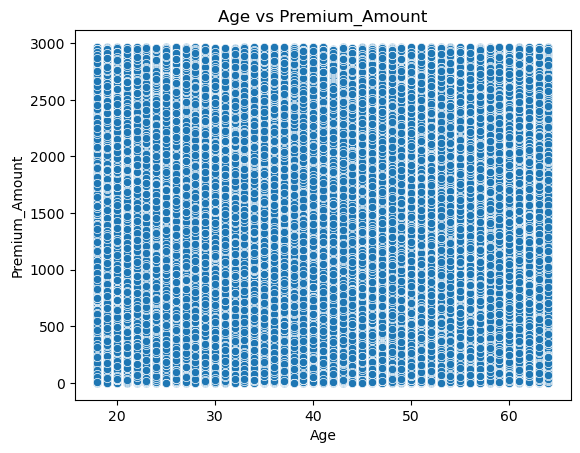

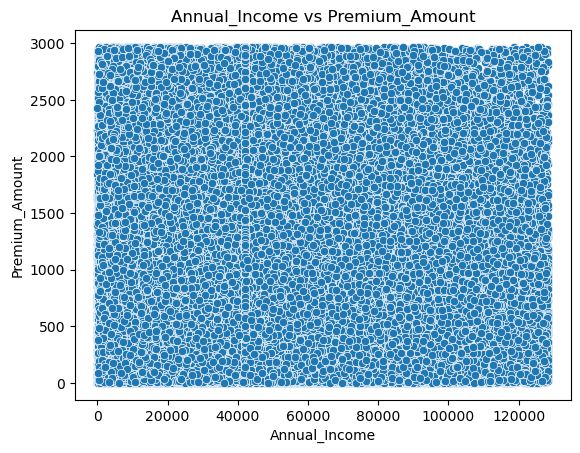

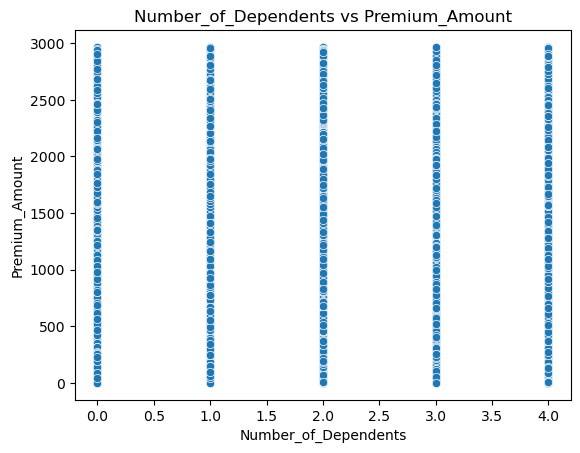

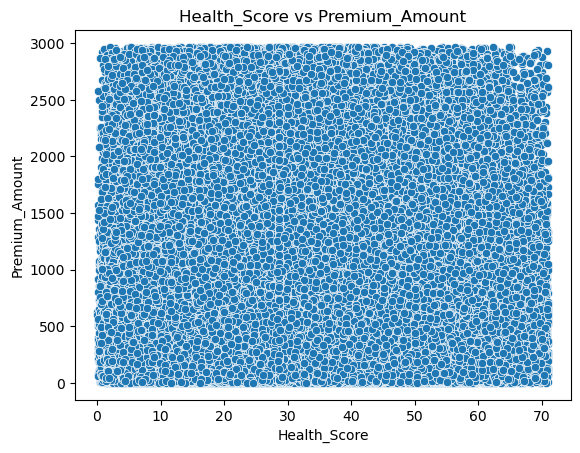

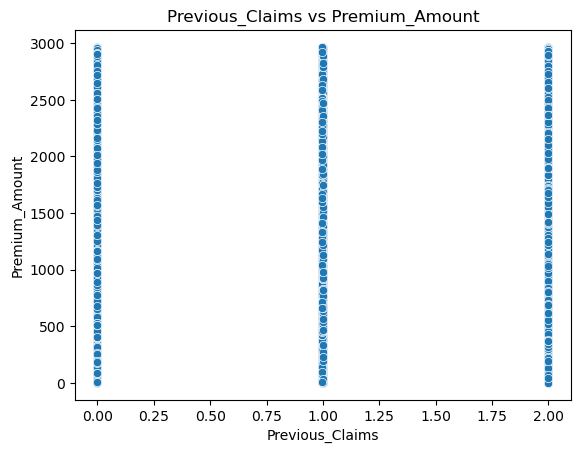

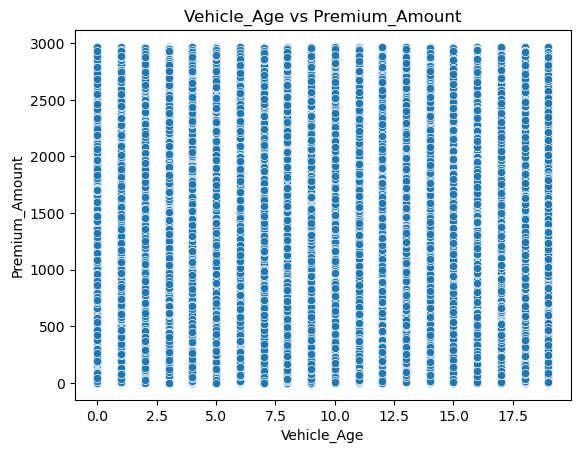

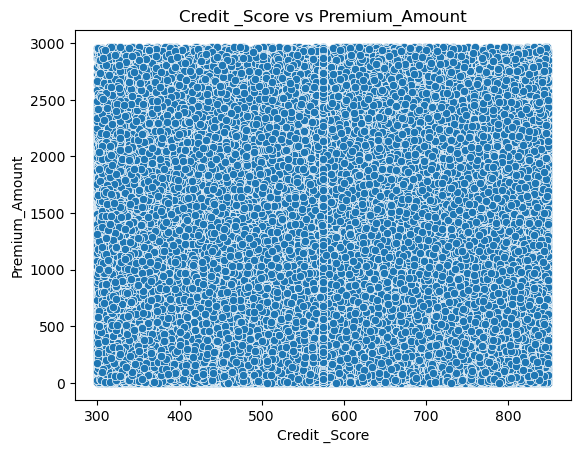

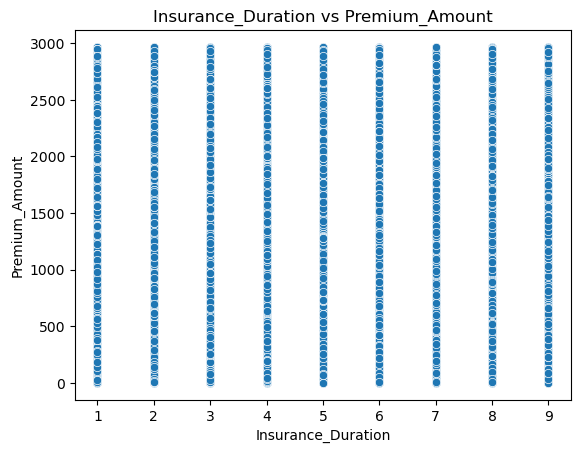

In [ ]:
#Bivariate Analysis (Target: Premium_Amount)
for col in numerical_cols:
    if col != 'Premium_Amount':
        sns.scatterplot(data=data, x=col, y='Premium_Amount')
        plt.title(f'{col} vs Premium_Amount')
        plt.show()

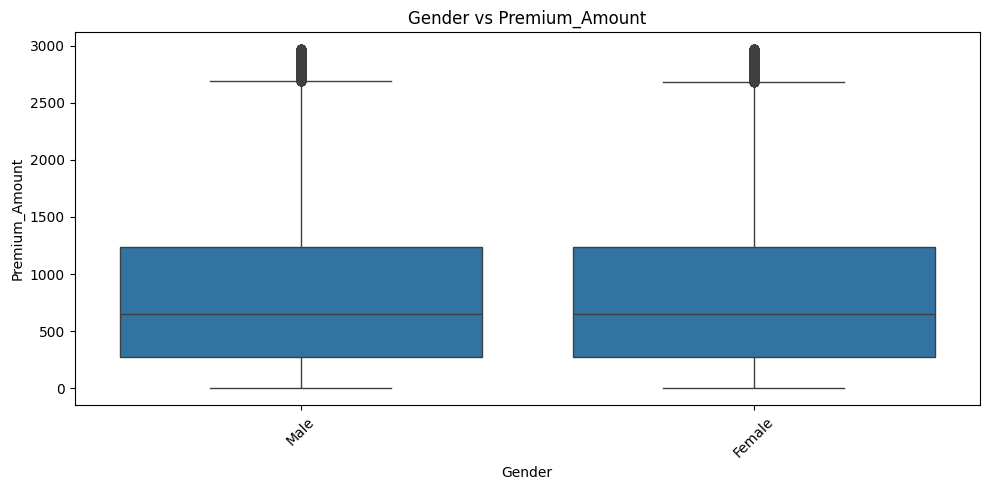

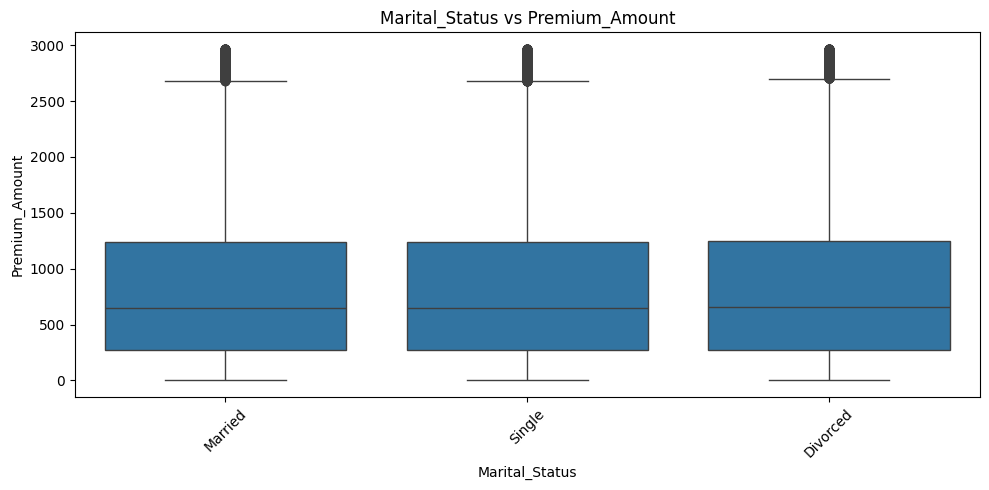

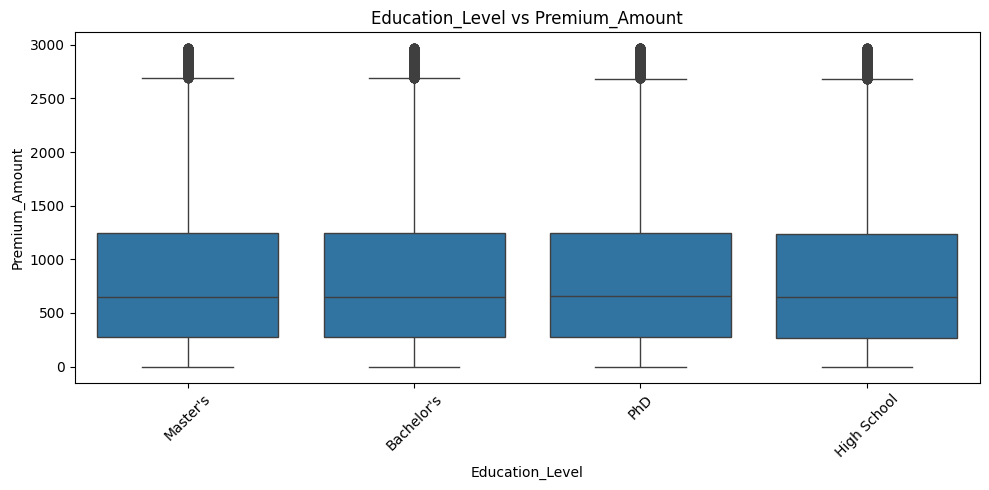

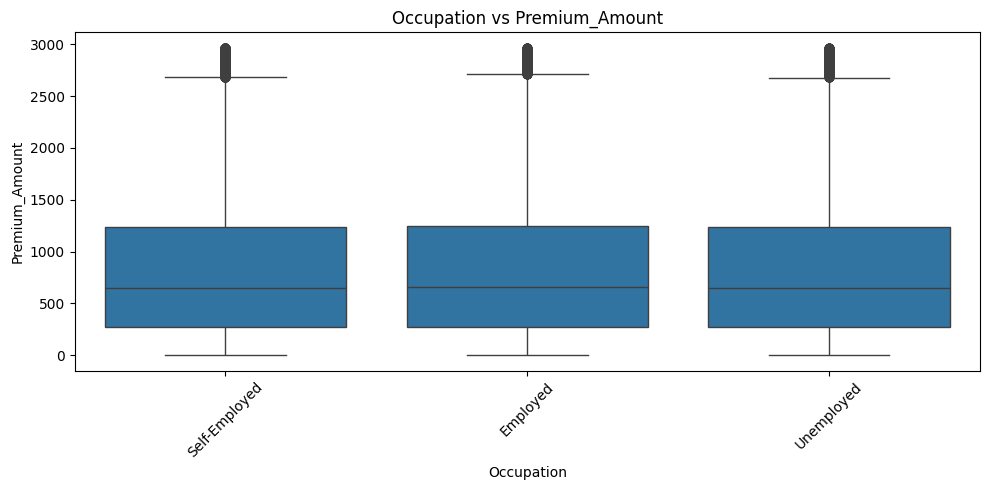

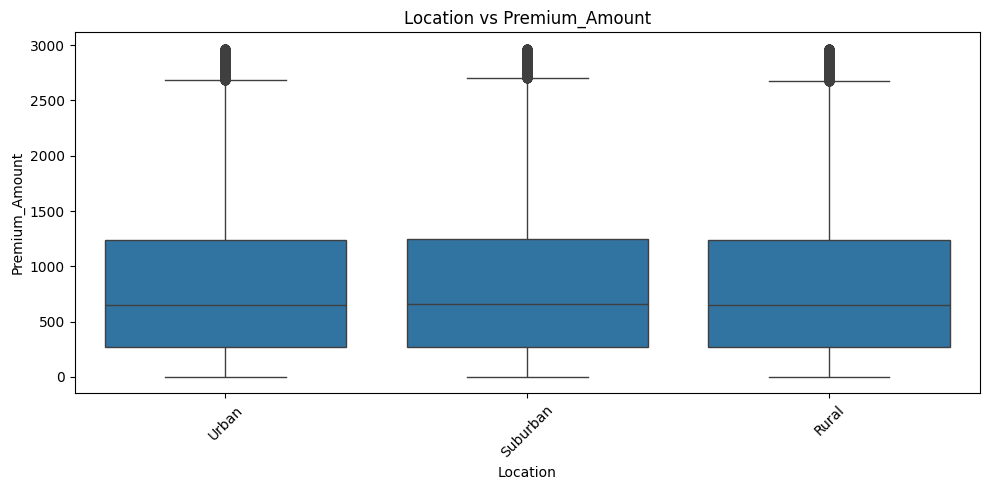

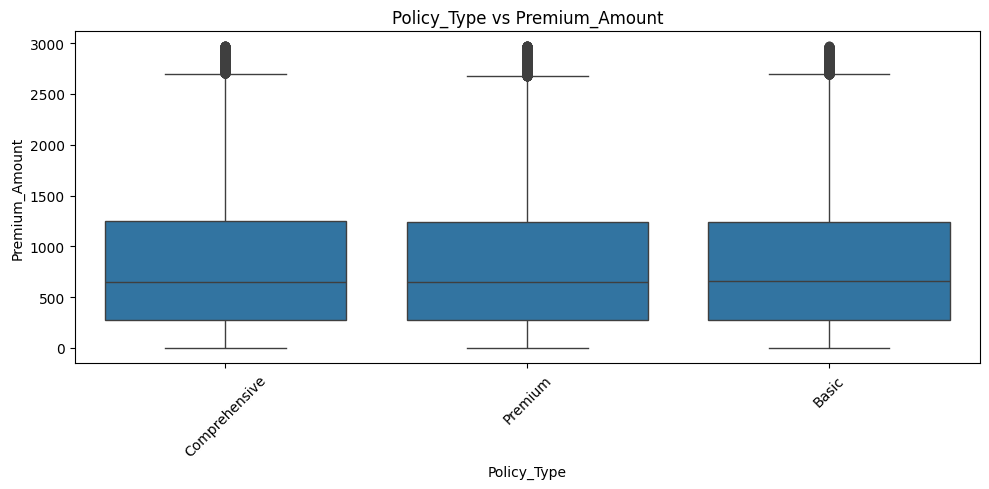

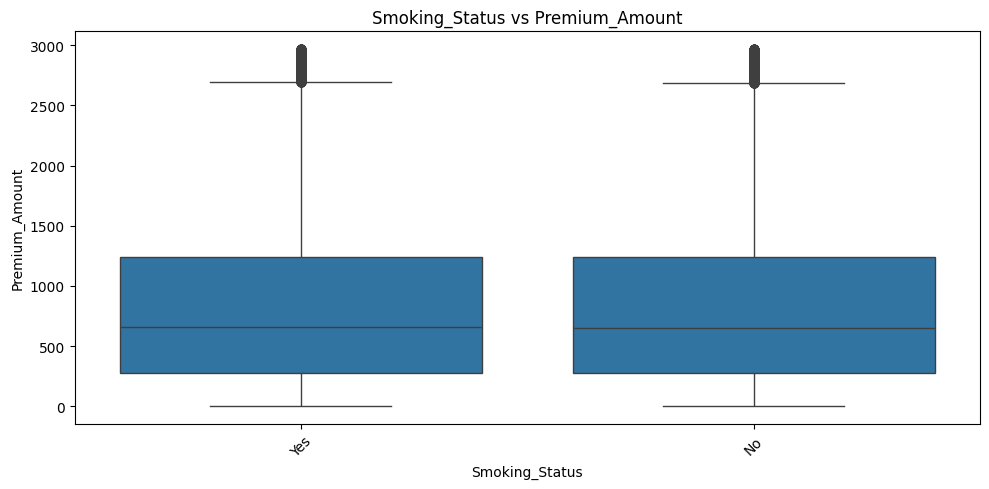

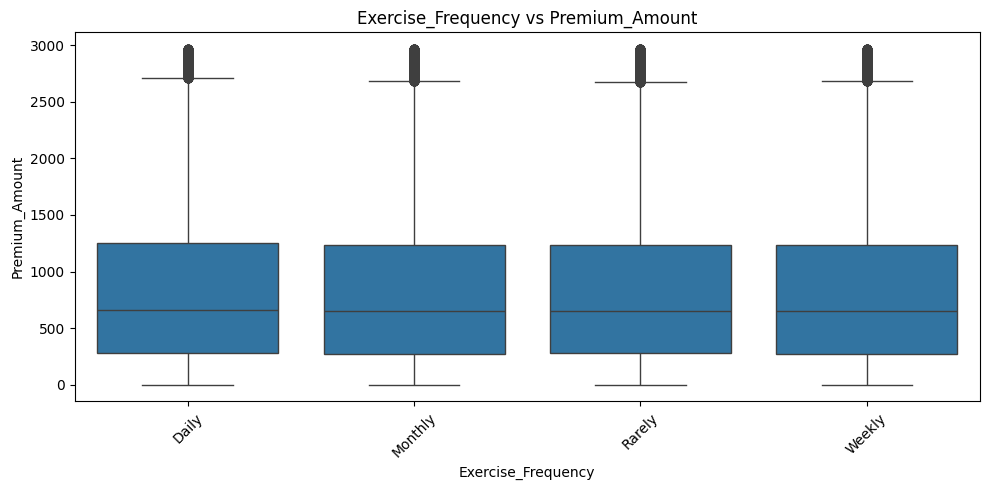

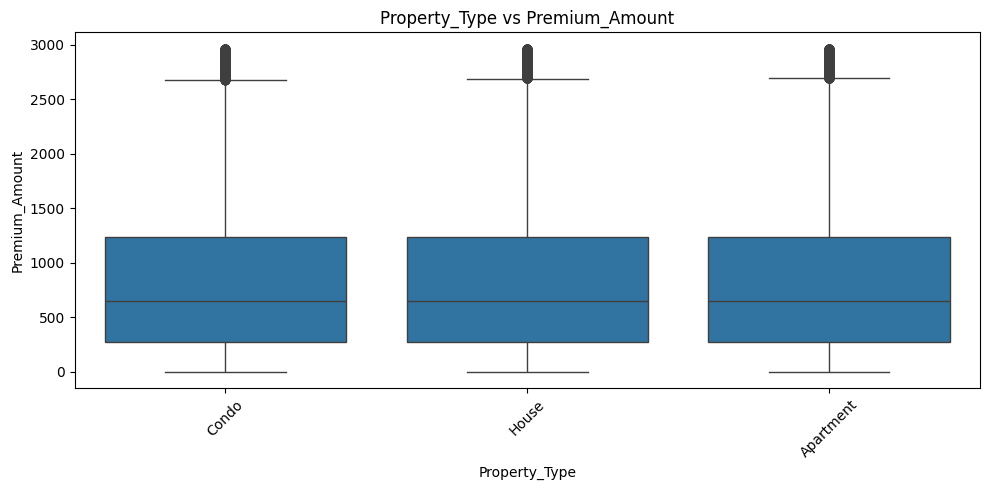

In [29]:
#Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='Premium_Amount', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Premium_Amount')
    plt.tight_layout()
    plt.show()

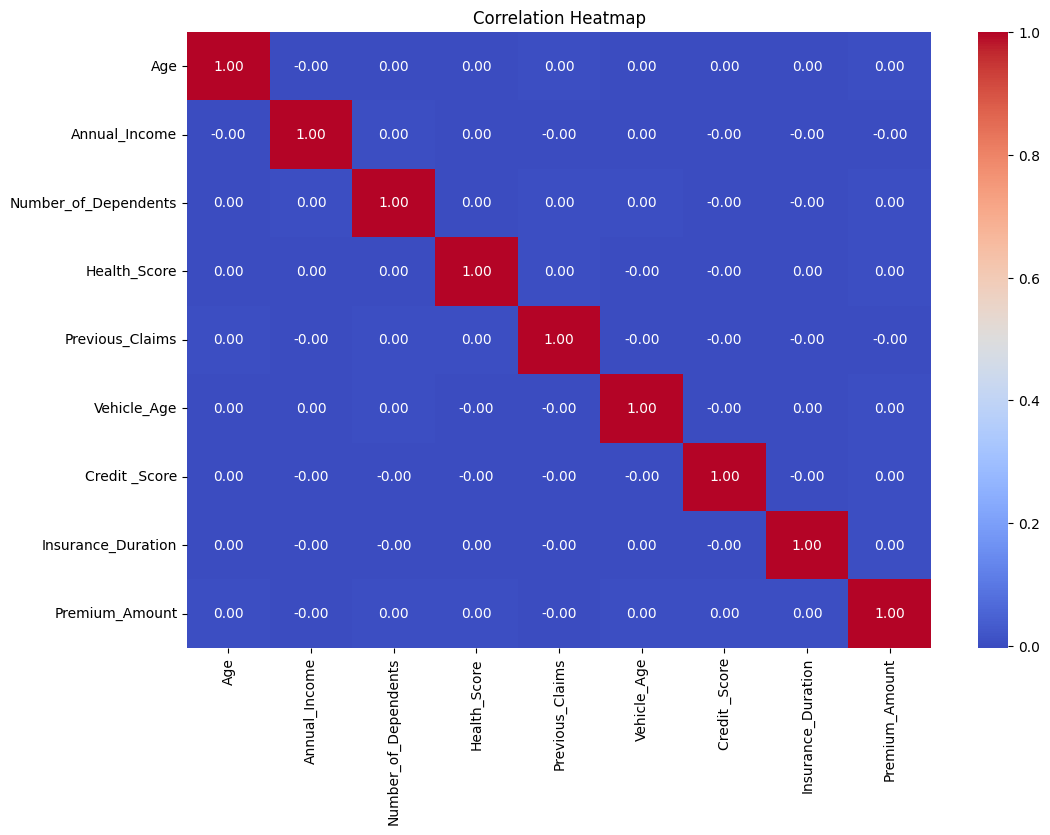

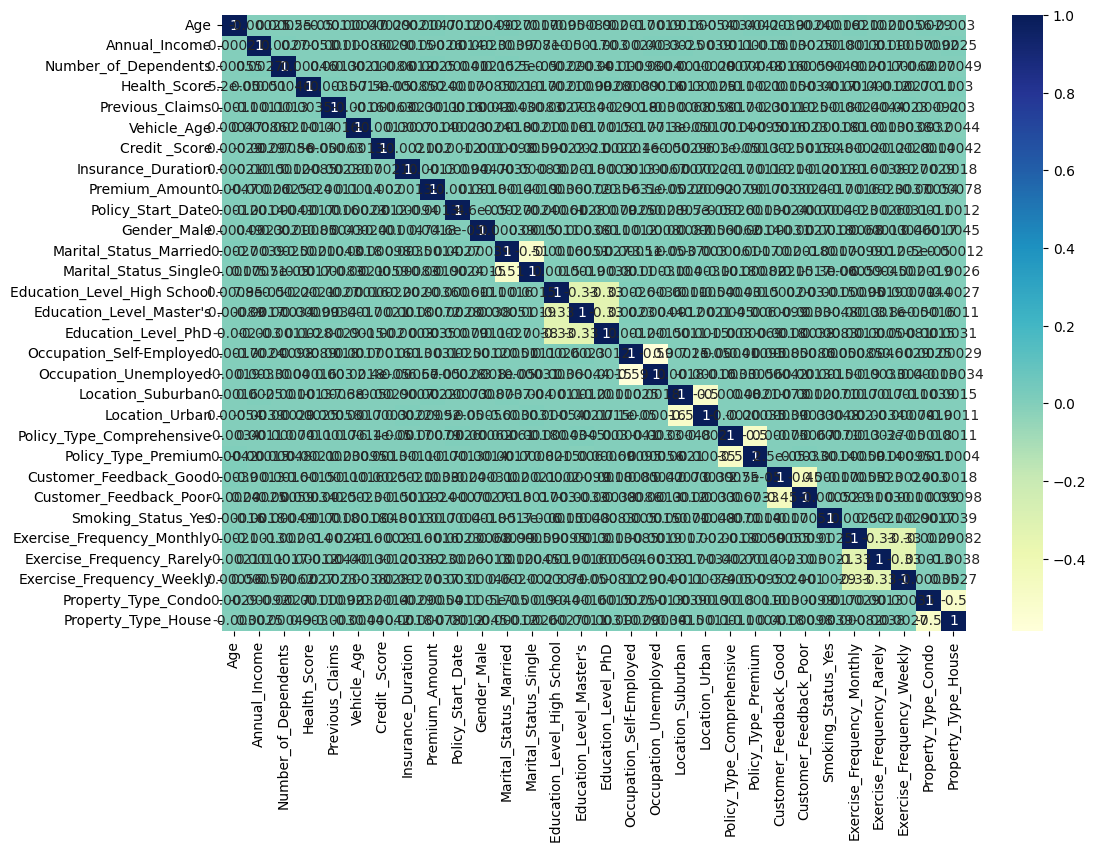

In [41]:
#Multivariate Analysis
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

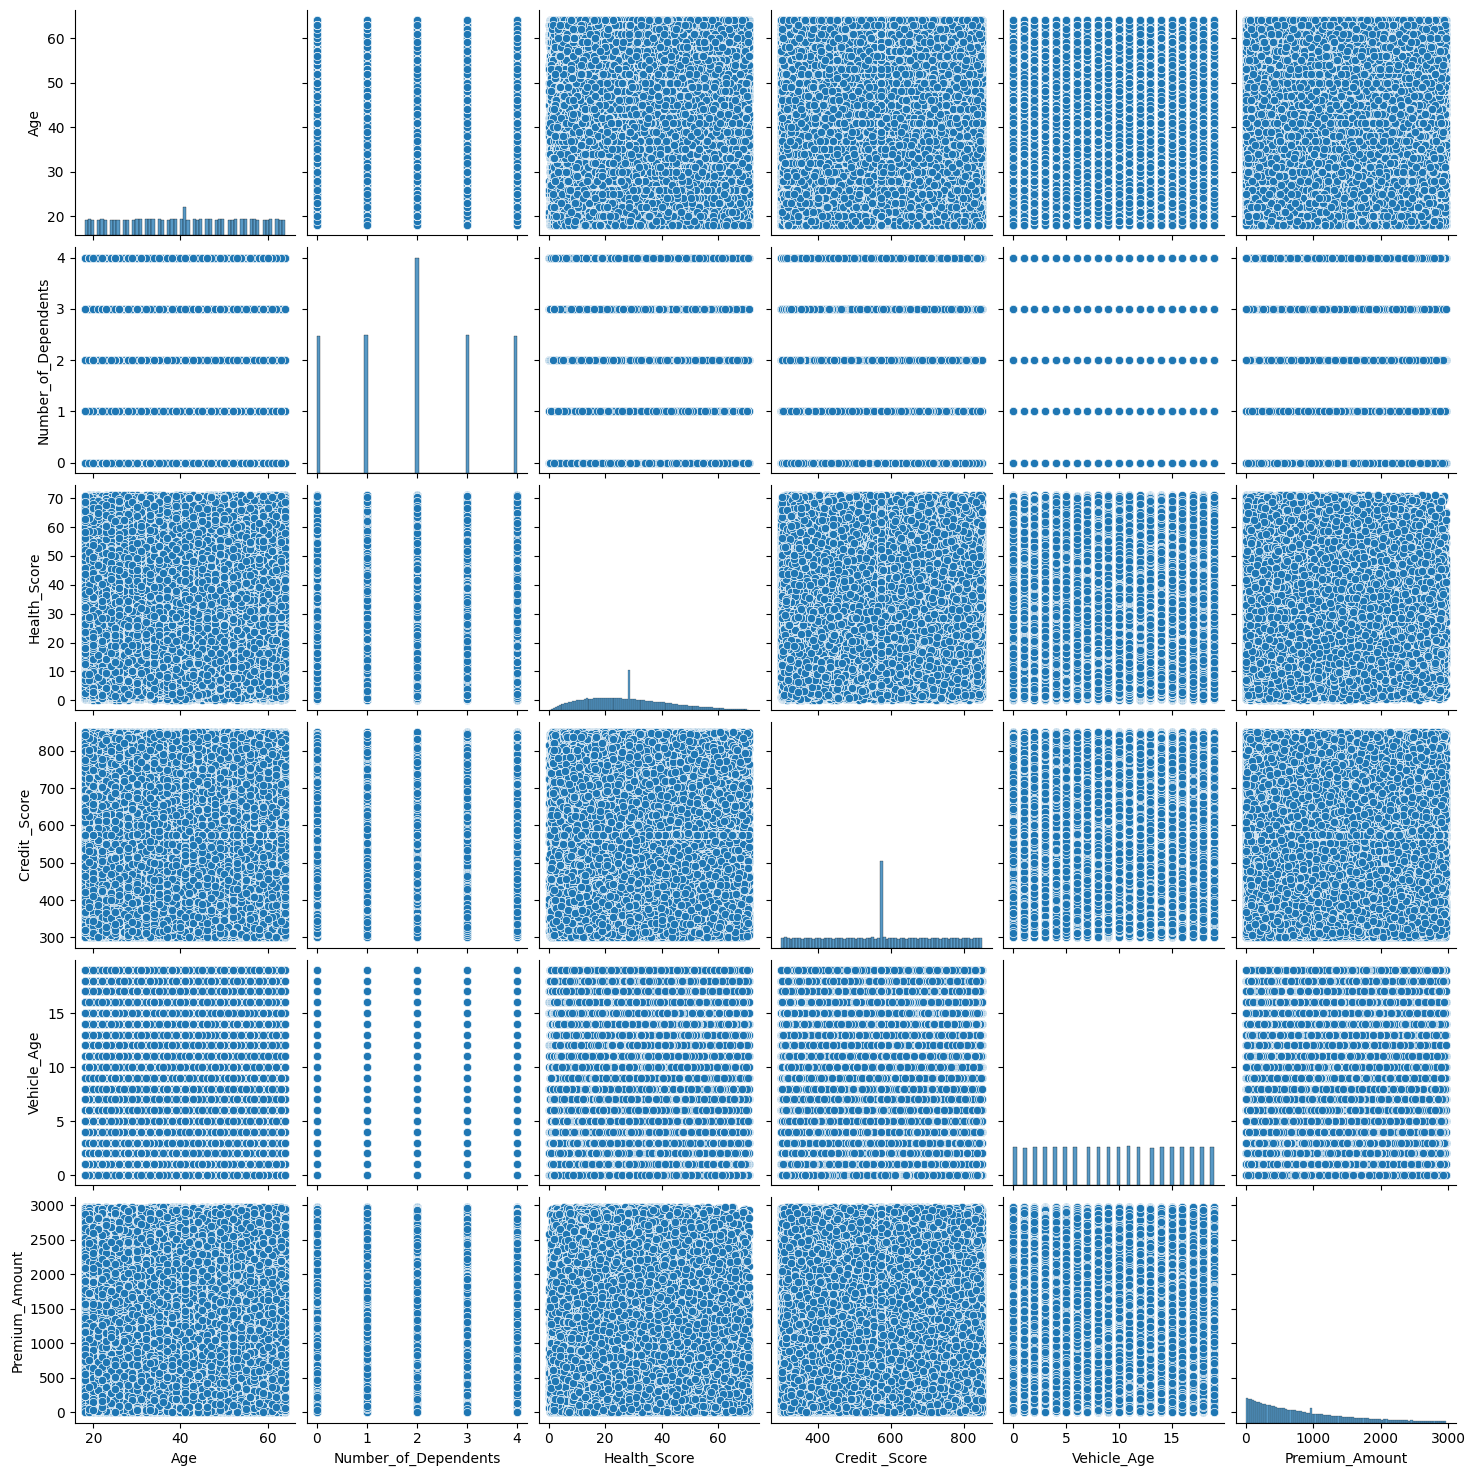

In [31]:
# Pairplot for top numerical features correlated with Premium_Amount
top_corr_features = corr_matrix['Premium_Amount'].abs().sort_values(ascending=False).index[1:6]
sns.pairplot(data[top_corr_features.tolist() + ['Premium_Amount']])
plt.show()

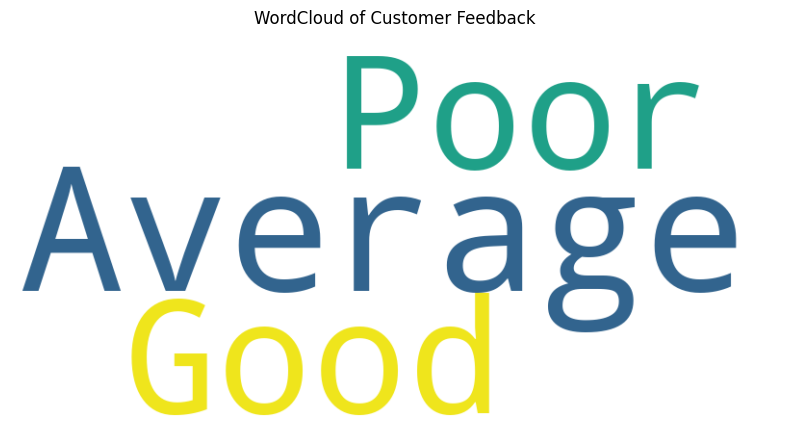

In [32]:
from wordcloud import WordCloud

text = " ".join(df['Customer_Feedback'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Customer Feedback')
plt.show()

In [33]:
# Feature Engineering Code
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from datetime import datetime

In [34]:
# Convert Policy_Start_Date to datetime
data['Policy_Start_Date'] = pd.to_datetime(data['Policy_Start_Date'], errors='coerce')

# 3. Create new feature: Years Since Policy Start
#current_date = pd.to_datetime("today")
#data['Policy_Years'] = ((current_date - df['Policy_Start_Date']).dt.days // 365).astype(int)

# 4. Encode categorical variables using One-Hot Encoding or Label Encoding
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level', 'Occupation', 'Location',
                    'Policy_Type', 'Customer_Feedback', 'Smoking_Status',
                    'Exercise_Frequency', 'Property_Type']

# Option A: One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Option B: Label Encoding (for simpler models or ordinal categories)
# label_enc = LabelEncoder()
# for col in categorical_cols:
#     df[col] = label_enc.fit_transform(df[col].astype(str))

# 5. Drop original date field if no longer needed
df = data.drop(columns=['Policy_Start_Date'])

# 6. Check final structure
print(df.info())

/tmp/ipython-input-34-1478585199.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Policy_Start_Date'] = pd.to_datetime(data['Policy_Start_Date'], errors='coerce')
/tmp/ipython-input-34-1478585199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Policy_Start_Date'] = pd.to_datetime(data['Policy_Start_Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 242492 entries, 0 to 278859
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          242492 non-null  float64
 1   Annual_Income                242492 non-null  float64
 2   Number_of_Dependents         242492 non-null  float64
 3   Health_Score                 242492 non-null  float64
 4   Previous_Claims              242492 non-null  float64
 5   Vehicle_Age                  242492 non-null  float64
 6   Credit _Score                242492 non-null  float64
 7   Insurance_Duration           242492 non-null  float64
 8   Premium_Amount               242492 non-null  float64
 9   Gender_Male                  242492 non-null  bool   
 10  Marital_Status_Married       242492 non-null  bool   
 11  Marital_Status_Single        242492 non-null  bool   
 12  Education_Level_High School  242492 non-null  bool   
 13  Educ

In [35]:
#train_test_split

from sklearn.model_selection import train_test_split

# Splitting the data into train and test data
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)
print(df_train.shape)
print(df_test.shape)

(193993, 29)
(48499, 29)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
#Define features and target
X = df.drop('Premium_Amount', axis=1)
y = df['Premium_Amount']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1) }

# Step 4: Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'R²': round(r2, 4)
    })

# Step 5: Display results
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

               Model     MAE        MSE      R²
2   Lasso Regression  567.11  486987.43 -0.0003
0  Linear Regression  567.12  487010.72 -0.0004
1   Ridge Regression  567.12  487010.71 -0.0004


In [42]:
X_train.head()

Age  Annual_Income  Number_of_Dependents  Health_Score  \
154274  23.0        25517.0                   3.0     14.351670   
200470  48.0        29611.0                   3.0      2.603868   
125885  64.0        45576.0                   2.0      5.216538   
157395  63.0        12608.0                   3.0     38.740646   
1386    53.0        24233.0                   1.0      6.991756   

        Previous_Claims  Vehicle_Age  Credit _Score  Insurance_Duration  \
154274         0.000000          5.0     676.000000                 7.0   
200470         0.998117          7.0     307.000000                 4.0   
125885         0.998117          5.0     622.000000                 6.0   
157395         1.000000         18.0     574.362049                 7.0   
1386           1.000000         17.0     446.000000                 4.0   

        Gender_Male  Marital_Status_Married  ...  Policy_Type_Comprehensive  \
154274         True                   False  ...                      False   
200470         True                   False  ...                       True   
125885         True                    True  ...                       True   
157395         True                    True  ...                      False   
1386           True                   False  ...                      False   

        Policy_Type_Premium  Customer_Feedback_Good  Customer_Feedback_Poor  \
154274                False                   False                   False   
200470                False                    True                   False   
125885                False                    True                   False   
157395                False                   False                    True   
1386                  False                   False                    True   

        Smoking_Status_Yes  Exercise_Frequency_Monthly  \
154274                True                       False   
200470                True                       False   
125885                True                        True   
157395                True                       False   
1386                  True                       False   

        Exercise_Frequency_Rarely  Exercise_Frequency_Weekly  \
154274                      False                      False   
200470                       True                      False   
125885                      False                      False   
157395                       True                      False   
1386                        False                       True   

        Property_Type_Condo  Property_Type_House  
154274                False                 True  
200470                False                False  
125885                 True                False  
157395                 True                False  
1386                  False                 True  

[5 rows x 28 columns]

In [44]:
## using statsmodel
import statsmodels.api as sm

# Convert boolean columns to integers
X_train = X_train.astype(int)

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fit the regression line using 'OLS'
LR = sm.OLS(y_train, X_train_sm).fit()

print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:         Premium_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.282
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.145
Time:                        13:38:33   Log-Likelihood:            -1.5474e+06
No. Observations:              193993   AIC:                         3.095e+06
Df Residuals:                  193964   BIC:                         3.095e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Build a MLR model using sklearn

In [54]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE

# Create a base model (Linear Regression)
lm = LinearRegression()

# Specify the number of features to select (you can adjust this)
# Let's select the top 10 features as an example
rfe = RFE(lm, n_features_to_select=10)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]

print("Selected features by RFE:")
print(selected_features_rfe)

# Train a Linear Regression model on the selected features
X_train_rfe = X_train[selected_features_rfe]
regressor_rfe = LinearRegression()
regressor_rfe.fit(X_train_rfe, y_train)

# Now you can proceed to evaluate this regressor on the test set
# X_test_rfe = X_test[selected_features_rfe]
# y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

Selected features by RFE:
Index(['Gender_Male', 'Marital_Status_Married', 'Education_Level_High School',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Location_Suburban', 'Location_Urban', 'Exercise_Frequency_Monthly',
       'Exercise_Frequency_Rarely', 'Exercise_Frequency_Weekly'],
      dtype='object')


LinearRegression()

In [46]:
##using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

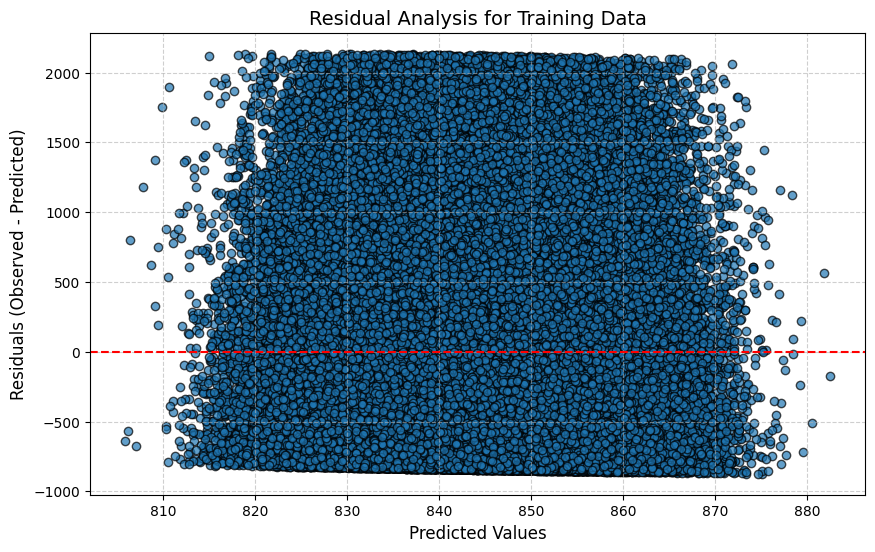

In [47]:
# Calculate residuals
y_train_pred = regressor.predict(X_train)
train_residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)  # Horizontal line at zero
plt.title('Residual Analysis for Training Data', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Observed - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [57]:
# Select the same features from the test data
X_test_rfe = X_test[selected_features_rfe]

# Predict on the test data using the RFE-trained regressor
y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

# Evaluate the model
mae_rfe = mean_absolute_error(y_test, y_test_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_test_pred_rfe)
r2_rfe = r2_score(y_test, y_test_pred_rfe)

print("Evaluation Metrics for RFE Model:")
print(f"  MAE: {mae_rfe:.2f}")
print(f"  MSE: {mse_rfe:.2f}")
print(f"  R²: {r2_rfe:.4f}")

Evaluation Metrics for RFE Model:
  MAE: 567.16
  MSE: 487042.76
  R²: -0.0004


**Interpretation:** The Ordinary Least Squares (OLS) regression results indicate that the current model is not effective in explaining the variation in insurance premiums. The R-squared value is essentially 0.000, which means that the model explains almost none of the variance in the target variable, Premium_Amount. The F-statistic is very low (1.282) with a p-value of 0.145, suggesting that the model, as a whole, is not statistically significant. Most individual features also have high p-values (greater than 0.05), indicating that they do not contribute meaningfully to the prediction of premiums. Only a few variables like Location_Urban and Exercise_Frequency_Weekly show some statistical significance, but their impact is modest. Additionally, the high condition number (403,000) points to possible multicollinearity or scaling issues in the data. Overall, these results suggest that the current set of features lacks predictive power, and further data enrichment or transformation is necessary to build a useful model.